## Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install light-the-torch >> /.tmp
!ltt install torch torchvision >> /.tmp
!pip install fastai --upgrade >> /.tmp

In [3]:
!pip3 install pandas
!pip3 install regex
!pip3 install contractions
!pip3 install tqdm
!pip3 install scikit-learn
!pip3 install numpy
!pip3 install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import regex as re
import contractions
# stopwords = ENGLISH_STOP_WORDS
# import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
import timeit
# plt.xticks(rotation=70)
# pd.options.mode.chained_assignment = None
# pd.set_option('display.max_colwidth', 100)
# %matplotlib inline

## Loading the Dataset

In [5]:

# Specify the path to your JSON file
file_path = '/content/drive/MyDrive/606/complaints-2021-05-14_08_16_.json'

# Open the JSON file
with open(file_path, 'r') as file:
    # Load the JSON data
    data = json.load(file)

# Convert the JSON data to a pandas DataFrame
df = pd.DataFrame(data)

# Now you can work with the DataFrame
# For example, you can access a specific field

In [6]:
data_ = pd.read_json('/content/drive/MyDrive/606/complaints-2021-05-14_08_16_.json')
dfs: pd.DataFrame = data_["_source"].apply(pd.Series)

In [7]:
dfs.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [8]:
selected_columns = ['complaint_id', 'issue', 'date_received', 'product', 'company_response', 'company', 'sub_product', 'timely', 'complaint_what_happened', 'sub_issue', 'consumer_consent_provided']

# Create a new DataFrame with only the selected columns
dfs= dfs[selected_columns]

# View the first few rows of the new DataFrame
dfs.head()

,complaint_id,issue,date_received,product,company_response,company,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Conventional home mortgage,Yes,,None,Consent not provided
4,3203545,Fees or interest,2019-04-05T12:00:00-05:00,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


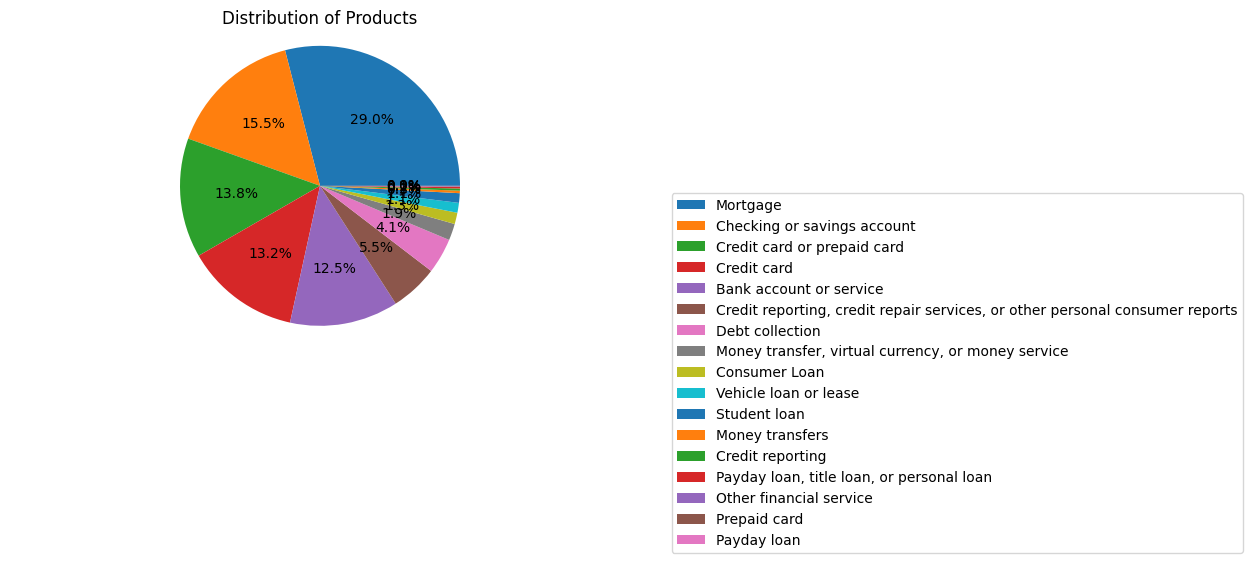

In [9]:

product_counts = dfs['product'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 4))
plt.pie(product_counts, labels=None, autopct='%1.1f%%')
plt.title('Distribution of Products')
plt.axis('equal')

# Create a legend for the pie chart
plt.legend(labels=product_counts.index, loc='upper right', bbox_to_anchor=(2, 0.5))

plt.show()

In [10]:
# Assuming 'product' is the column containing product categories
top_product_categories = dfs['product'].value_counts().nlargest(7).index

# Filter the dataframe to include only the top 7 product categories
dfs = dfs[dfs['product'].isin(top_product_categories)]
dfs['product'] = dfs['product'].replace('Checking or savings account', 'Bank account or service')
dfs['product'] = dfs['product'].replace('Credit card', 'Credit card or prepaid card')

# View the first few rows of the new DataFrame
dfs.head()

<ipython-input-10-0136a975138c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['product'] = dfs['product'].replace('Checking or savings account', 'Bank account or service')
<ipython-input-10-0136a975138c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['product'] = dfs['product'].replace('Credit card', 'Credit card or prepaid card')


,complaint_id,issue,date_received,product,company_response,company,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Conventional home mortgage,Yes,,None,Consent not provided
4,3203545,Fees or interest,2019-04-05T12:00:00-05:00,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


## Sanity Checks

In [11]:
dfs.shape

(73369, 11)

In [12]:
dfs.isnull().sum()

complaint_id                     0
issue                            0
date_received                    0
product                          0
company_response                 0
company                          0
sub_product                  10373
timely                           0
complaint_what_happened          0
sub_issue                    42997
consumer_consent_provided      887
dtype: int64

In [13]:
null_values = dfs['product'].isnull().sum()

# Print the number of null values
print("Number of null values in the 'product' column:", null_values)

Number of null values in the 'product' column: 0


In [14]:
dfs['complaint_what_happened'].nunique()

19202

In [15]:
filtered_df = dfs[dfs['complaint_what_happened'] != '']

filtered_df

,complaint_id,issue,date_received,product,company_response,company,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
10,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,"Credit reporting, credit repair services, or o...",Closed with explanation,JPMORGAN CHASE & CO.,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided
11,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,"Credit reporting, credit repair services, or o...",Closed with explanation,JPMORGAN CHASE & CO.,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided
14,3224980,Managing an account,2019-04-27T12:00:00-05:00,Bank account or service,Closed with explanation,JPMORGAN CHASE & CO.,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided
...,...,...,...,...,...,...,...,...,...,...,...
78301,3071045,Problem with a lender or other company chargin...,2018-11-10T12:00:00-05:00,Bank account or service,Closed with monetary relief,JPMORGAN CHASE & CO.,Checking account,Yes,My husband passed away. Chase bank put check o...,Money was taken from your account on the wrong...,Consent provided
78303,3094545,"Advertising and marketing, including promotion...",2018-12-07T12:00:00-05:00,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,General-purpose credit card or charge card,Yes,After being a Chase Card customer for well ove...,Didn't receive advertised or promotional terms,Consent provided
78309,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,Bank account or service,Closed with explanation,JPMORGAN CHASE & CO.,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided


### Example of our Feature and Target VAriable

In [16]:
print('Complaint:', filtered_df['complaint_what_happened'][14])
print('\nProduct category for complaint:',filtered_df['product'][14])

Complaint: my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time  date happen XX/XX/2018 check number XXXX claim number is XXXX with chase

Product category for complaint: Bank account or service


## Distrbution of our Target Variable

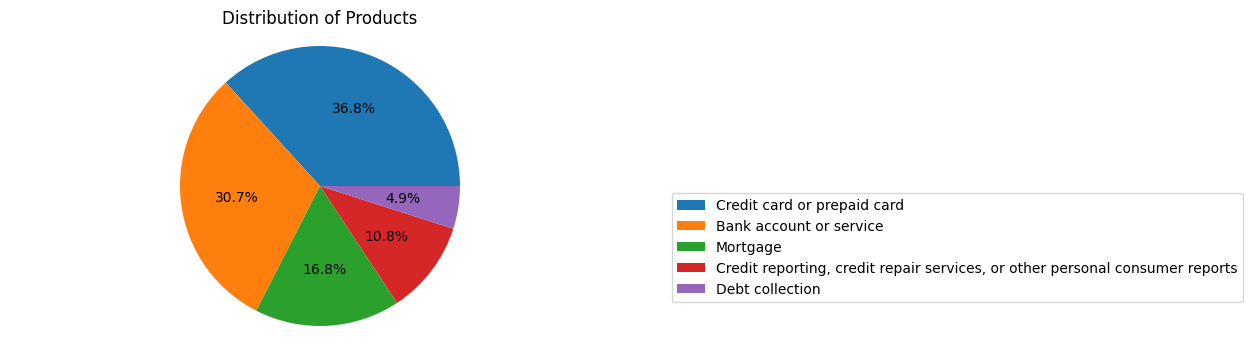

In [17]:

product_counts = filtered_df['product'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 4))
plt.pie(product_counts, labels=None, autopct='%1.1f%%')
plt.title('Distribution of Products')
plt.axis('equal')

# Create a legend for the pie chart
plt.legend(labels=product_counts.index, loc='upper right', bbox_to_anchor=(2, 0.5))

plt.show()

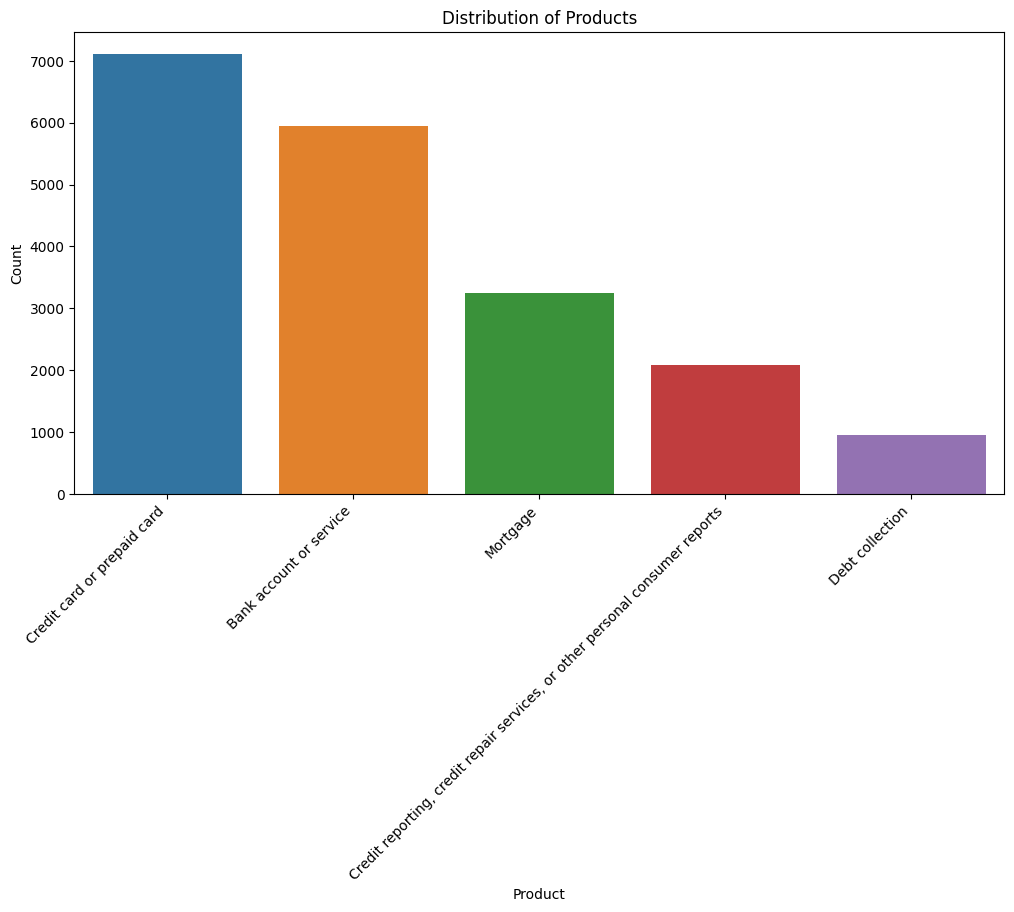

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'product_counts' is a pandas Series with product counts

# Plot the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='product', data=filtered_df, order=filtered_df['product'].value_counts().index)
plt.title('Distribution of Products')
plt.xlabel('Product')
plt.ylabel('Count')

# Optionally rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


## Pre-Processing our Complaints text feature

In [19]:
rws = filtered_df.loc[:, ['product', 'complaint_what_happened']]

In [20]:
rws

,product,complaint_what_happened
1,Debt collection,Good morning my name is XXXX XXXX and I apprec...
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
10,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...
11,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX..."
14,Bank account or service,my grand son give me check for {$1600.00} i de...
...,...,...
78301,Bank account or service,My husband passed away. Chase bank put check o...
78303,Credit card or prepaid card,After being a Chase Card customer for well ove...
78309,Credit card or prepaid card,"On Wednesday, XX/XX/XXXX I called Chas, my XXX..."
78310,Bank account or service,I am not familiar with XXXX pay and did not un...


## Tokenizing Data

We'll use tokenizer library in order to split each individual word into a token. We will apply NLTK.word_tokenize() function to the “complaint_what_happened” column and create a new column named “tokenized”.

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
rws['tokenized'] = rws['complaint_what_happened'].apply(word_tokenize)
rws.head()

,product,complaint_what_happened,tokenized
1,Debt collection,Good morning my name is XXXX XXXX and I apprec...,"[Good, morning, my, name, is, XXXX, XXXX, and,..."
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,"[I, upgraded, my, XXXX, XXXX, card, in, XX/XX/..."
10,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...,"[Chase, Card, was, reported, on, XX/XX/2019, ...."
11,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX...","[On, XX/XX/2018, ,, while, trying, to, book, a..."
14,Bank account or service,my grand son give me check for {$1600.00} i de...,"[my, grand, son, give, me, check, for, {, $, 1..."


## Converting all Characters to Lowercase
Transforming all words to lowercase is an important pre-processing step. In this case, we will once again append a new column named “lower” to the sliced dataframe which will transform all the tokenized words into lowercase. However, because we have to iterate over multiple words we will use a simple for-loop within a lambda function to apply the “lower” function to each word.

In [23]:
rws['lower'] = rws['tokenized'].apply(lambda x: [word.lower() for word in x])
rws.head()

,product,complaint_what_happened,tokenized,lower
1,Debt collection,Good morning my name is XXXX XXXX and I apprec...,"[Good, morning, my, name, is, XXXX, XXXX, and,...","[good, morning, my, name, is, xxxx, xxxx, and,..."
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,"[I, upgraded, my, XXXX, XXXX, card, in, XX/XX/...","[i, upgraded, my, xxxx, xxxx, card, in, xx/xx/..."
10,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...,"[Chase, Card, was, reported, on, XX/XX/2019, ....","[chase, card, was, reported, on, xx/xx/2019, ...."
11,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX...","[On, XX/XX/2018, ,, while, trying, to, book, a...","[on, xx/xx/2018, ,, while, trying, to, book, a..."
14,Bank account or service,my grand son give me check for {$1600.00} i de...,"[my, grand, son, give, me, check, for, {, $, 1...","[my, grand, son, give, me, check, for, {, $, 1..."


## Removing Punctuations
Punctuation is often removed from our corpus since they serve little value once we begin to analyze our data. Continuing the previous pattern, we will create a new column which has the punctuation removed. We will again utilize a for-loop within a lambda function to iterate over the tokens but this time using an IF condition to only output alpha characters. It might be a little difficult to see but the tokenized punctuations in the “ lower” column has been removed.

In [24]:
punc = string.punctuation
rws['no_punc'] = rws['lower'].apply(lambda x: [word for word in x if word not in punc])
rws.head()

,product,complaint_what_happened,tokenized,lower,no_punc
1,Debt collection,Good morning my name is XXXX XXXX and I apprec...,"[Good, morning, my, name, is, XXXX, XXXX, and,...","[good, morning, my, name, is, xxxx, xxxx, and,...","[good, morning, my, name, is, xxxx, xxxx, and,..."
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,"[I, upgraded, my, XXXX, XXXX, card, in, XX/XX/...","[i, upgraded, my, xxxx, xxxx, card, in, xx/xx/...","[i, upgraded, my, xxxx, xxxx, card, in, xx/xx/..."
10,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...,"[Chase, Card, was, reported, on, XX/XX/2019, ....","[chase, card, was, reported, on, xx/xx/2019, ....","[chase, card, was, reported, on, xx/xx/2019, h..."
11,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX...","[On, XX/XX/2018, ,, while, trying, to, book, a...","[on, xx/xx/2018, ,, while, trying, to, book, a...","[on, xx/xx/2018, while, trying, to, book, a, x..."
14,Bank account or service,my grand son give me check for {$1600.00} i de...,"[my, grand, son, give, me, check, for, {, $, 1...","[my, grand, son, give, me, check, for, {, $, 1...","[my, grand, son, give, me, check, for, 1600.00..."


## Removing Stopwords
Stopwords are typically useless words and do not add much meaning to a sentence. In the English language common stopwords include “you, he, she, in, a, has, are, etc.”

We are going to add a new column “no_stopwords” which will remove the stopwords from the “no_punc” column since it has been tokenized, had been converted to lowercase and punctuation was removed


In [25]:
stop_words = set(stopwords.words('english'))
rws['stopwords_removed'] = rws['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
rws.head()

,product,complaint_what_happened,tokenized,lower,no_punc,stopwords_removed
1,Debt collection,Good morning my name is XXXX XXXX and I apprec...,"[Good, morning, my, name, is, XXXX, XXXX, and,...","[good, morning, my, name, is, xxxx, xxxx, and,...","[good, morning, my, name, is, xxxx, xxxx, and,...","[good, morning, name, xxxx, xxxx, appreciate, ..."
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,"[I, upgraded, my, XXXX, XXXX, card, in, XX/XX/...","[i, upgraded, my, xxxx, xxxx, card, in, xx/xx/...","[i, upgraded, my, xxxx, xxxx, card, in, xx/xx/...","[upgraded, xxxx, xxxx, card, xx/xx/2018, told,..."
10,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...,"[Chase, Card, was, reported, on, XX/XX/2019, ....","[chase, card, was, reported, on, xx/xx/2019, ....","[chase, card, was, reported, on, xx/xx/2019, h...","[chase, card, reported, xx/xx/2019, however, f..."
11,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX...","[On, XX/XX/2018, ,, while, trying, to, book, a...","[on, xx/xx/2018, ,, while, trying, to, book, a...","[on, xx/xx/2018, while, trying, to, book, a, x...","[xx/xx/2018, trying, book, xxxx, xxxx, ticket,..."
14,Bank account or service,my grand son give me check for {$1600.00} i de...,"[my, grand, son, give, me, check, for, {, $, 1...","[my, grand, son, give, me, check, for, {, $, 1...","[my, grand, son, give, me, check, for, 1600.00...","[grand, son, give, check, 1600.00, deposit, ch..."


In [26]:
# Convert each list to a continuous string and create a new column
rws['cleaned'] = rws['stopwords_removed'].apply(lambda row: ' '.join(row))

# Print the updated DataFrame
rws['cleaned'][1]

'good morning name xxxx xxxx appreciate could help put stop chase bank cardmember services 2018 wrote chase asking debt verification sent statement acceptable asking bank validate debt instead receiving mail every month attempting collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help'

In [27]:
from tqdm import tqdm
from nltk.corpus import stopwords

processed_body = []
for i in tqdm(rws['cleaned']):
    # print(i)
    #Regular expression that removes all the html tags pressent in the body
    i=re.sub('(<[\w\s]*/?>)'," ",i)
    #Expanding all the contractions present in the body to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+'," ",i)
    #Removing all the digits present in the body text
    i=re.sub('\d+'," ",i)
    i=re.sub(' +', ' ', i)
    i=re.sub(r'(xxxx\s*)+', ' ', i)

    #Making all the  text to be of lower case as well as remvoing the stopwords and words of length less than 3
    processed_body.append(" ".join([j.lower().translate(str.maketrans('', '', string.punctuation)) for j in i.split() if len(j)>=3]))


100%|██████████| 19337/19337 [00:06<00:00, 2767.82it/s]


In [28]:
processed_body[0]

'good morning name appreciate could help put stop chase bank cardmember services wrote chase asking debt verification sent statement acceptable asking bank validate debt instead receiving mail every month attempting collect debt right know information consumer chase account thanks advance help'

In [29]:
len(processed_body)

19337

In [30]:
final_dataset = pd.DataFrame({'Complaints': processed_body, 'Target':rws['product']})

In [31]:
final_dataset

,Complaints,Target
1,good morning name appreciate could help put st...,Debt collection
2,upgraded card told agent upgrade anniversary d...,Credit card or prepaid card
10,chase card reported however fraudulent applica...,"Credit reporting, credit repair services, or o..."
11,trying book ticket came across offer applied t...,"Credit reporting, credit repair services, or o..."
14,grand son give check deposit chase account fun...,Bank account or service
...,...,...
78301,husband passed away chase bank put check hold ...,Bank account or service
78303,chase card customer well decade offered multip...,Credit card or prepaid card
78309,wednesday called chas visa credit card provide...,Credit card or prepaid card
78310,familiar pay understand great risk provides co...,Bank account or service


- Since it is text data, each word is a feature, each complaint has unnecessary features, which might not be relevant for classification model.
- We tried using SelectKBest method from sklearn, along with chi2 as the scoring function, to select k values for selecting best features, ranging in [50000 -> 1000]. This did not improve the accuracy of the model in a significant way.
- TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection or corpus. However, TF-IDF can result in high-dimensional data, especially when dealing with large vocabularies, and this is where TSVD comes in.
- TSVD can be particularly useful for clustering and semi-supervised learning tasks. Clustering algorithms, such as K-means or hierarchical clustering, can struggle with high-dimensional data due to the curse of dimensionality, and reducing the dimensionality of the data with TSVD can lead to better performance.

In [32]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

In [33]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(binary=True)),
    ('tfidf', TfidfTransformer())
     ,('scaler', MaxAbsScaler())
#     ,('selector', SelectKBest(chi2, k=50000))
    ,('TSVD', TruncatedSVD(n_components=250))
])

In [34]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Target' column
final_dataset['Target_encoded'] = label_encoder.fit_transform(final_dataset['Target'])


In [35]:
x_train = pipeline.fit_transform(final_dataset['Complaints'], final_dataset['Target'])
x_train.shape

(19337, 250)

In [36]:
from sklearn.model_selection import train_test_split
dX_train, dX_test, dy_train, dy_test = train_test_split(x_train,
                                                        final_dataset['Target'],
                                                        test_size=0.4,
                                                        random_state=42
                                                       )

In [37]:
dy_test.value_counts()

Credit card or prepaid card                                                     2837
Bank account or service                                                         2415
Mortgage                                                                        1297
Credit reporting, credit repair services, or other personal consumer reports     811
Debt collection                                                                  375
Name: Target, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg = log_reg.fit(dX_train, dy_train)

In [39]:
log_reg_score = log_reg.score(dX_test, dy_test)
print(f'Training Accuracy Score: {log_reg_score:.2%}')

Training Accuracy Score: 82.59%


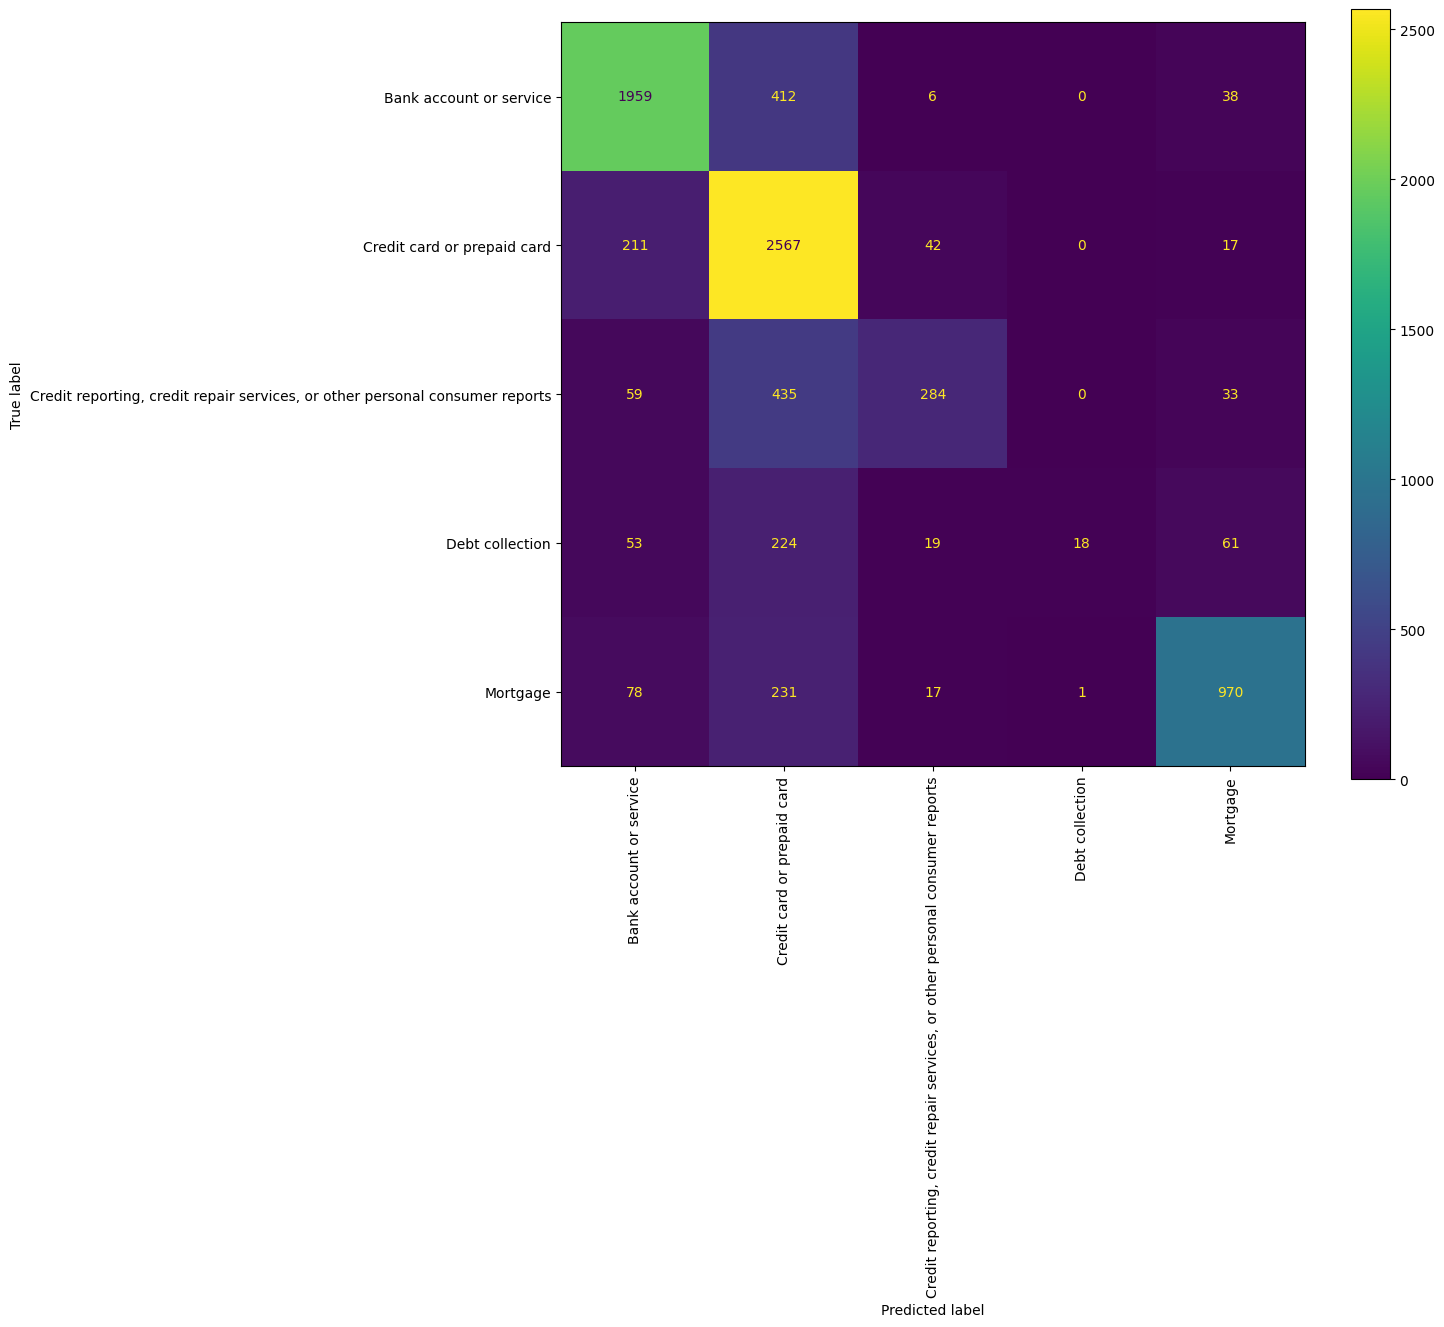

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = rf.predict(dX_test)

# Get the unique classes from the true labels
classes = np.unique(dy_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))
# Create the matrix
cm = confusion_matrix(dy_test, y_pred, labels=classes)
cmp = ConfusionMatrixDisplay(cm, display_labels=classes)

cmp.plot(ax=ax)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=13)

rf.fit(dX_train, dy_train)

# Calculate the accuracy of the model on the test data
rf_score = rf.score(dX_test, dy_test)

# Print the accuracy
print(f' Training Score: {rf_score:.2%}')

 Training Score: 74.96%


### CROSS VALIDATION

- We're doing a five fold cross validation to determine if changing the sample of training and testing dataset would provide  a significant boost to our model
- This could be the case in heavily imbalanced classes, but we will have to validate our data and model it with five different sample to determine that

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#Pipeline implementation
def generate_estimates(comp=5):

    modeling_pipeline = Pipeline([
         ('model', LogisticRegression())
        ]
    )

    return modeling_pipeline

In [ ]:
from sklearn.model_selection import cross_validate

clf = generate_estimates()
cv_results = cross_validate(clf, dX_train, dy_train,
                            scoring=['accuracy', 'f1_macro'],
                            cv=5,
                            error_score='raise')

cv_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'fit_time': array([1.80116749, 1.8009491 , 3.41892982, 3.2555294 , 1.92133164]),
 'score_time': array([0.05036259, 0.06447315, 0.10322571, 0.05438161, 0.05632877]),
 'test_accuracy': array([0.83128636, 0.83193277, 0.82611506, 0.82967033, 0.83511154]),
 'test_f1_macro': array([0.74686962, 0.75342796, 0.75397752, 0.76168218, 0.75453722])}

## Grid Search

- We'll use Grid Search to determine the best possible parameters for the highest accuracy metric of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(solver='liblinear')
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(dX_train, dy_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.4f}')


Best parameters: {'C': 1, 'penalty': 'l1'}
Best score: 0.8302


### Hyperparameter Tuned Logistic Regression

In [ ]:
log_reg_hyper = LogisticRegression(C=1, penalty='l1')
log_reg_hyper = log_reg.fit(dX_train, dy_train)

In [ ]:
log_reg_score = log_reg_hyper.score(dX_test, dy_test)
print(f'Training Accuracy Score: {log_reg_score:.2%}')

Training Accuracy Score: 82.68%


- There is no significant change after applying the best possible determined parameters to our training data, we move onto checking with different models

# LLM

## Installing necessary libraries for LLM

In [ ]:
!pip install transformers
!pip install torch

In [ ]:
# Check GPU availability
print("GPU Available:", tf.test.is_gpu_available())

# Check TPU availability
tpu_available = False
devices = tf.config.list_logical_devices()
for device in devices:
    if device.device_type == 'TPU':
        tpu_available = True
        break

print("TPU Available:", tpu_available)

GPU Available: True
TPU Available: False


In [ ]:
final_dataset['Target'].value_counts()

Credit card or prepaid card                                                     7109
Bank account or service                                                         5940
Mortgage                                                                        3246
Credit reporting, credit repair services, or other personal consumer reports    2087
Debt collection                                                                  955
Name: Target, dtype: int64

1. **Stratified Data Split:** The data set is split in a way that takes into account the class label distribution.
2. **Handling Imbalanced Labels:** This approach is employed to address the issue of imbalanced class labels.
3. **Stratified Split:** The data is divided while preserving the relative proportion of each class.

In [ ]:
possible_labels = final_dataset.Target.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Debt collection': 0,
 'Credit card or prepaid card': 1,
 'Credit reporting, credit repair services, or other personal consumer reports': 2,
 'Bank account or service': 3,
 'Mortgage': 4}

In [ ]:
final_dataset['label'] = final_dataset.Target.replace(label_dict)


In [ ]:
final_dataset

,Complaints,Target,label,data_type,Target_encoded
1,good morning name appreciate could help put st...,Debt collection,0,val,3
2,upgraded card told agent upgrade anniversary d...,Credit card or prepaid card,1,train,1
10,chase card reported however fraudulent applica...,"Credit reporting, credit repair services, or o...",2,train,2
11,trying book ticket came across offer applied t...,"Credit reporting, credit repair services, or o...",2,val,2
14,grand son give check deposit chase account fun...,Bank account or service,3,train,0
...,...,...,...,...,...
78301,husband passed away chase bank put check hold ...,Bank account or service,3,val,0
78303,chase card customer well decade offered multip...,Credit card or prepaid card,1,train,1
78309,wednesday called chas visa credit card provide...,Credit card or prepaid card,1,train,1
78310,familiar pay understand great risk provides co...,Bank account or service,3,val,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(final_dataset['Complaints'],
                                                  final_dataset['label'],
                                                  test_size=0.3,
                                                  random_state=42 )#stratify=final_dataset.label.values

final_dataset['data_type'] = ['not_set']*final_dataset.shape[0]

# final_dataset.loc[X_train, 'data_type'] = 'train'
# final_dataset.loc[X_val, 'data_type'] = 'val'

# final_dataset.groupby(['Target', 'label', 'data_type']).count()

1. **Tokenization Process:**
   - Tokenization is a crucial initial step in natural language processing (NLP).
   - It involves splitting raw text into smaller units called tokens.
   - Tokens are typically numeric representations of words, enabling machines to understand and process text.

2. **BERT Tokenizer Construction:**
   - A BERT (Bidirectional Encoder Representations from Transformers) tokenizer is constructed for text encoding.
   - This tokenizer is based on the WordPiece algorithm and is designed for handling text data.
   
3. **Data Encoding and Splitting:**
   - To prepare text data for model training, the `batch_encode_plus` function is utilized.
   - This function takes title text as input and performs several important tasks:
     - It encodes the sequences with special tokens relevant to the BERT model.
     - By setting `return_attention_mask=True`, it provides an attention mask to identify tokens.
     - The sequences are padded to a specific maximum length (e.g., max_length=256).
     - It returns the encoded data in a format suitable for PyTorch (`return_tensors='pt'`).
   - The encoded dataset is then split into training and validation data subsets, facilitating further model training and evaluation.


In [ ]:
from transformers import BertTokenizer


## Creating functions to implement LLM Pre-trained model

In [ ]:
import torch
from torch.utils.data import TensorDataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

encoded_data_train = tokenizer.batch_encode_plus(
    final_dataset[final_dataset.data_type=='train'].Complaints.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    final_dataset[final_dataset.data_type=='val'].Complaints.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(final_dataset[final_dataset.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(final_dataset[final_dataset.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\softwares\Anaconda\lib\site-packages\transformers\tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1. **Sequence Classification:**
   - Each title is treated as a unique sequence, and the goal is to classify each sequence into one of the seventeen labels (i.e., labels).
   
2. **Model Choice and Number of Labels:**
   - The model `bert-base-uncased` is selected for this task. It is a smaller pre-trained BERT model suitable for various NLP tasks.
   - `num_labels` is used to indicate the number of output labels. In this case, there are seventeen labels to classify the sequences into.

3. **Output Configuration:**
   - The output configuration is tailored for the specific task:
     - The `output_attentions` parameter is not a concern, as it's not needed for the classification task.
     - Similarly, the `output_hidden_states` parameter is not required for the task.
     
   These settings optimize the use of resources and focus on the primary objective of classifying titles into the predefined labels.

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer

# Now you can use BertForSequenceClassification in your code

model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Fine Tuning with BERT

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Target' column
final_dataset['Target_encoded'] = label_encoder.fit_transform(final_dataset['Target'])

# Print the mapping between original classes and encoded values
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

Class Mapping: {'Bank account or service': 0, 'Credit card or prepaid card': 1, 'Credit reporting, credit repair services, or other personal consumer reports': 2, 'Debt collection': 3, 'Mortgage': 4}


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Assuming final_dataset is already defined

dx_train = X_train.to_list()
dy_train = y_train.to_list()

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=17).to('cuda')  # Move the model to GPU

optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 1

# Training loop
for epoch in range(num_epochs):
  with tf.device('/device:GPU:0'):
    for i in tqdm(range(len(dx_train))):
        complaint = dx_train[i]
        target = dy_train[i]

        # Tokenize the input complaint
        inputs = tokenizer(complaint, padding=True, truncation=True, return_tensors="pt").to('cuda')

        # Convert target to tensor
        label = torch.tensor(target).unsqueeze(0).to('cuda')  # Assuming target is a scalar, adjust if it's a list or tensor

        # Forward pass
        outputs = model(**inputs, labels=label)
        loss = outputs.loss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Save the fine-tuned model
model.save_pretrained("bert_model")
tokenizer.save_pretrained("bert_model")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 13535/13535 [17:25<00:00, 12.94it/s]


('fine_tuned_bert_model/tokenizer_config.json',
 'fine_tuned_bert_model/special_tokens_map.json',
 'fine_tuned_bert_model/vocab.txt',
 'fine_tuned_bert_model/added_tokens.json')

In [ ]:
!zip -r /content/bert_file.zip /content/fine_tuned_bert_model
!mv /content/bert_file.zip /content/drive/MyDrive/606

  adding: content/fine_tuned_bert_model/ (stored 0%)
  adding: content/fine_tuned_bert_model/tokenizer_config.json (deflated 75%)
  adding: content/fine_tuned_bert_model/config.json (deflated 61%)
  adding: content/fine_tuned_bert_model/model.safetensors (deflated 7%)
  adding: content/fine_tuned_bert_model/vocab.txt (deflated 53%)
  adding: content/fine_tuned_bert_model/special_tokens_map.json (deflated 42%)


## Training on index and encoded labels of fine tuned bert model

In [ ]:
import zipfile
import os
import torch
from transformers import BertTokenizer, BertForSequenceClassification


# # Path to the zip file
# zip_path = '/content/drive/MyDrive/606/bert_file.zip'

# # Extract the contents of the zip file
# extract_path = '/content/fine_tuned_bert_model'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)
dx_val = X_val.to_list()

# Load the fine-tuned model and tokenizer
model_path = "/content/fine_tuned_bert_model"
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Tokenize and predict on the validation set
model.eval()
predictions = []
with torch.no_grad():
  with tf.device('/device:GPU:0'):
    for i in tqdm(range(len(dx_val))):
          text = dx_val[i]
          inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
          outputs = model(**inputs)
          probs = torch.nn.functional.softmax(outputs.logits, dim=-1).squeeze().tolist()
          predicted_label = torch.argmax(outputs.logits).item()
          predictions.append(predicted_label)

100%|██████████| 5802/5802 [46:49<00:00,  2.07it/s]


NameError: ignored

In [ ]:
accuracy = accuracy_score(y_val, predictions)
f1_macro = f1_score(y_val, predictions, average='macro')
print(f'Accuracy: {accuracy:.4f}')
print(f'f1_score: {f1_macro:.4f}')

Accuracy: 0.8718
f1_score: 0.7084


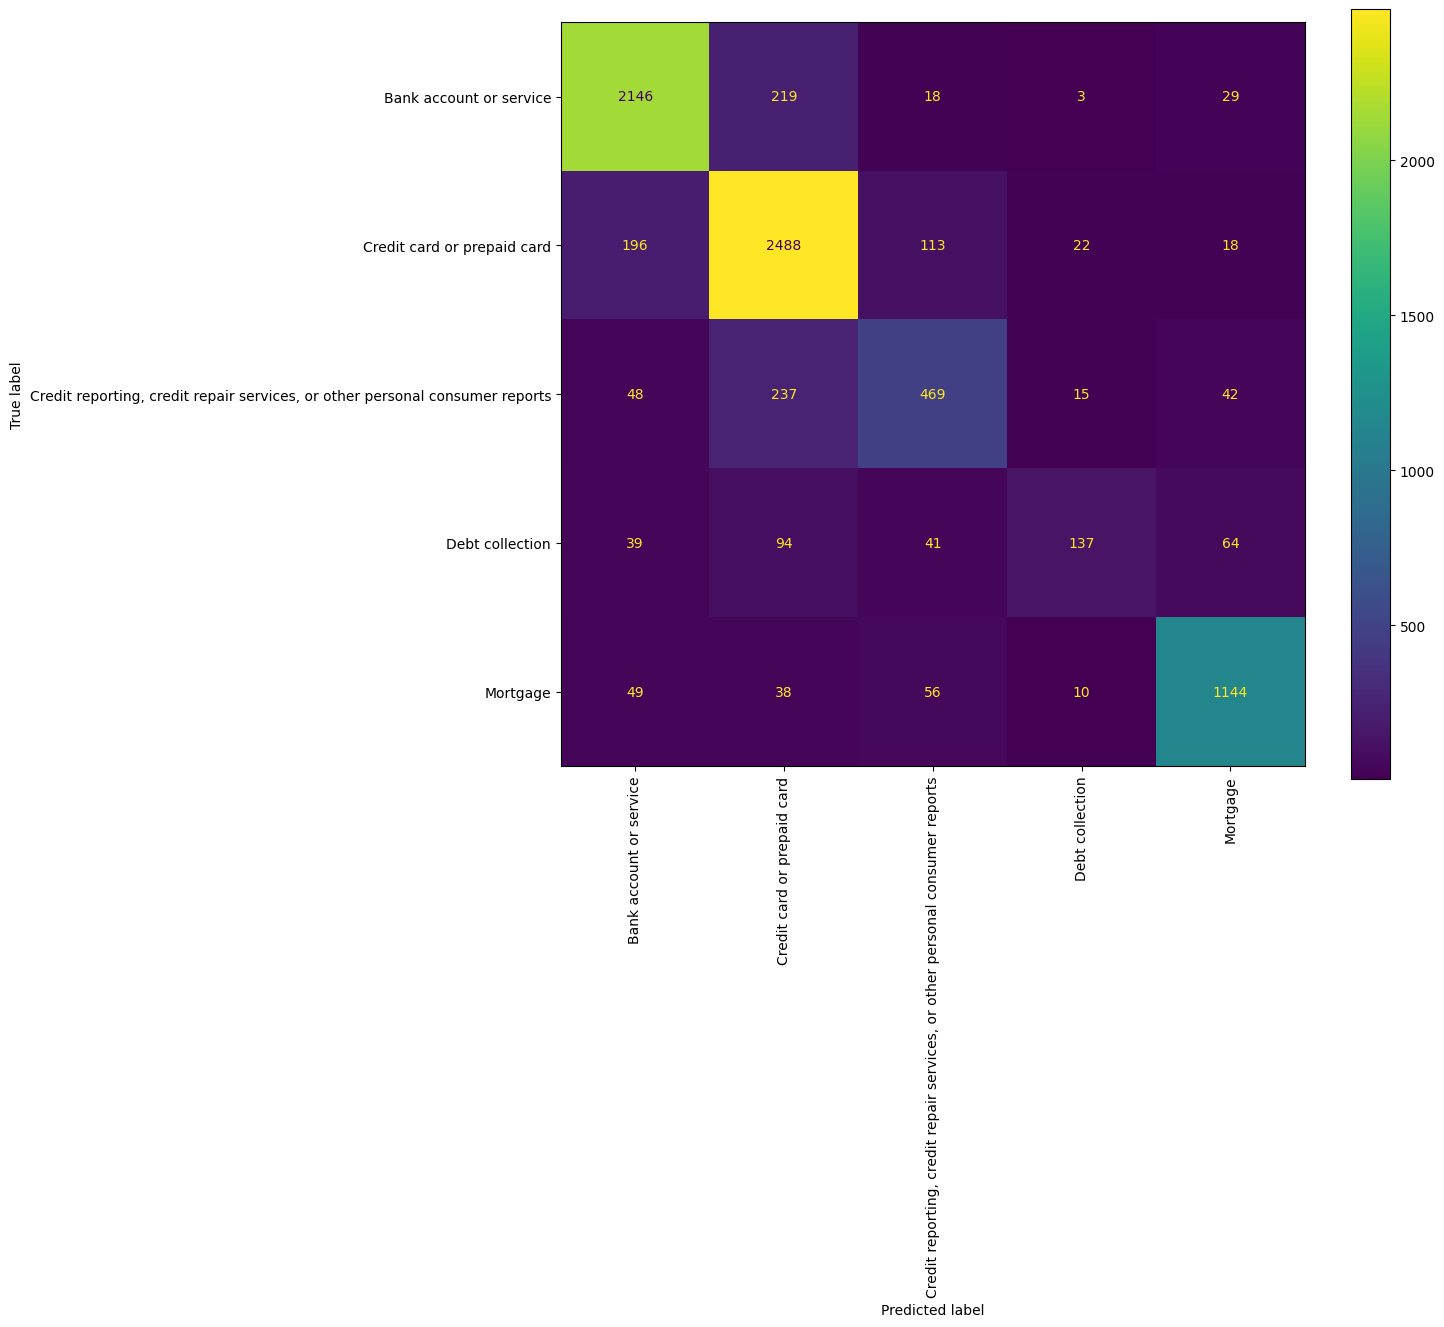

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = log_reg.predict(dX_test)

# Get the unique classes from the true labels
classes = np.unique(dy_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))
# Create the matrix
cm = confusion_matrix(dy_test, y_pred, labels=classes)
cmp = ConfusionMatrixDisplay(cm, display_labels=classes)

cmp.plot(ax=ax)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
epochs = 10
seed_val = 17

for epoch in tqdm(range(1, epochs+1)):
  with tf.device('/device:GPU:0'):
    model.train()
    loss_train_total = 0
    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'loss: {loss_train_avg}')

    val_loss, predictions, true_vals,accuracy = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'accuracy: {accuracy}')
    tqdm.write(f'val_loss: {val_loss}')
    tqdm.write(f'val_accuracy: {val_f1}')

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 2s 921us/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 2s 881us/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.5334 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 2s 902us/step - loss: 0.4209 - accuracy: 0.8535 - val_loss: 0.3916 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 2s 908us/step - loss: 0.4061 - accuracy: 0.8580 - val_loss: 0.3750 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 2s 916us/step - loss: 0.3755 - accuracy: 0.8669 - val_loss: 0.3709 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 2s 879us/step - loss: 0.3655 - accuracy: 0.8711 - val_loss: 0.3618 - v

In [ ]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

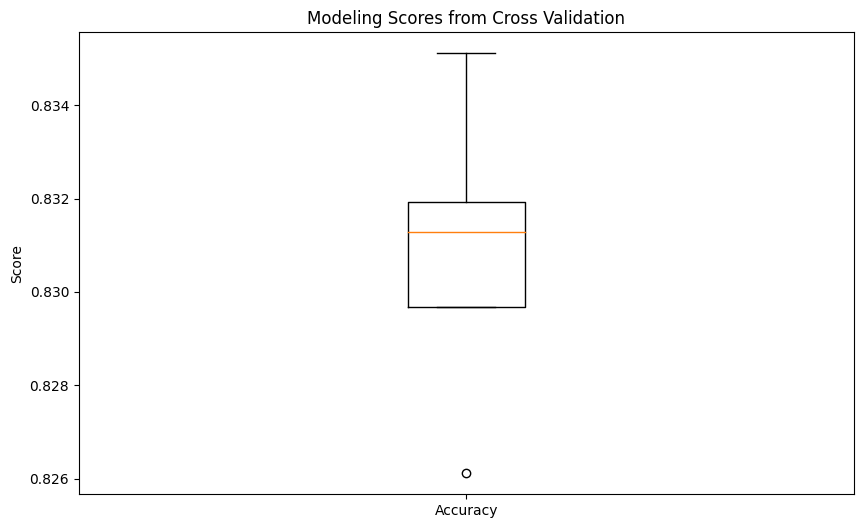

In [ ]:
accuracy = cv_results['val_accuracy']

all_scores = [accuracy]
metric_names = ['Accuracy']

plt.figure(figsize=(10, 6))
plt.boxplot(all_scores)
plt.title('Modeling Scores from Cross Validation')
plt.xticks(range(1, len(metric_names) + 1), metric_names)
plt.ylabel('Score')
plt.show()

Saving figure keras_learning_curves_plot


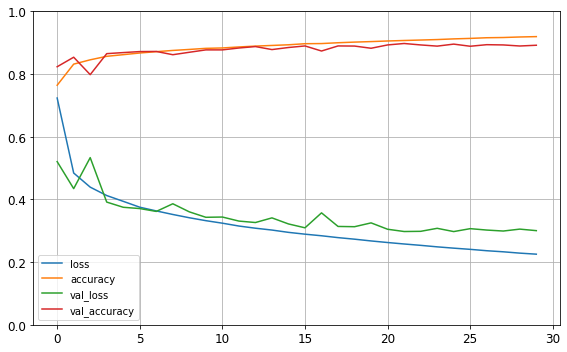

In [ ]:
import pandas as pd

pd.DataFrame(model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()